# Predicting Housing Prices with Chatgpt

For this data project, I wanted to experiment with the capabilities of ChatGPT Plus (GPT 4) to create an ML model that predicts the sale price of a common housing data set: __[Ames Iowa Housing Data](https://www.kaggle.com/datasets/marcopale/housing?resource=download)__

__[Link to the full conversation (visuals are excluded)](https://chat.openai.com/share/27047108-7be4-4321-a518-33b4bfc315e4)__

### TL;DR
1. Using ChatGPT, I was able to create a better performing model in about ~30 minutes vs. the week it took me when first encountering this __[project years ago.](https://github.com/Jmizraji/Predicting-Housing-Prices)__ (This tool is incredible!)

- ChatGPT: RMSE - \$14,148.48 and a coefficient of determination (R² score) of 0.965
- Old Project: RMSE - \$29\,000.98 and a coefficient of determination (R² score) of 0.897

*RMSE explains on average, how far the predictions are away from the actual values of sale price. 
R² measures how well the chosen factors (like year built, sq ft) predict the outcome we're interested in (sale price)*

2. Exploratory analysis is a breeze, speeding up any data professional's time to insights

3. In a real world scenario, this won't automate the full process of building ML models, but it will certainly help play an integral part of speeding up the process. Humans are still needed to understand what models are valuable to a business, communicate the value to stakeholders, how to extract the data, what data to include in a model, monitor how it performs on new data, how to best scale it, etc.  

# ChatGPT
### Prompt: "Can you help me explain what is in this file?"

In [16]:
import pandas as pd

# Load the data
data = pd.read_csv('./data/AmesHousing.csv')

# Display the first few rows of the dataframe
data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900




The file 'AmesHousing.csv' appears to be a dataset related to housing prices in Ames, Iowa. Each row in the dataset represents a single house sale. There are 82 columns in this dataset, each representing a different attribute of the house or the sale. Here are the columns in the dataset:

1. `Order`: An arbitrary ID/reference number for each sale.
2. `PID`: Parcel identification number - this can be used with a city's GIS system to identify the property.
3. `MS SubClass`: Identifies the type of dwelling involved in the sale.
4. `MS Zoning`: Identifies the general zoning classification of the sale.
5. `Lot Frontage`: Linear feet of street connected to the property.
6. `Lot Area`: Lot size in square feet.
7. `Street`: Type of road access to the property.
8. `Alley`: Type of alley access to the property.
9. `Lot Shape`: General shape of the property.
10. `Land Contour`: Flatness of the property.
11. and so on...

This dataset seems to have many columns, going all the way to `SalePrice`, which is likely the price at which the house was sold.

Please note that some columns contain missing values (NaN), which means the information is not available for those specific houses. For example, the `Alley` column has some missing values, which may mean that those properties do not have an alley access.

Would you like a detailed summary of this data or need information about specific columns?

### Prompt: "Can you list the top 10 key points of the data?"

In [17]:
# Getting the shape of the data
num_rows, num_cols = data.shape

# Checking for missing values
missing_values = data.isnull().sum()

# Getting the number of unique values in each column
unique_values = data.nunique()

# Summary statistics
summary_stats = data.describe(include='all')

# Top 10 columns with most missing values
most_missing = missing_values.nlargest(10)

# Top 10 columns with most unique values
most_unique = unique_values.nlargest(10)

num_rows, num_cols, missing_values.sum(), most_missing, most_unique, summary_stats.transpose()

(2930,
 82,
 13997,
 Pool QC          2917
 Misc Feature     2824
 Alley            2732
 Fence            2358
 Fireplace Qu     1422
 Lot Frontage      490
 Garage Yr Blt     159
 Garage Finish     159
 Garage Qual       159
 Garage Cond       159
 dtype: int64,
 Order            2930
 PID              2930
 Lot Area         1960
 Gr Liv Area      1292
 Bsmt Unf SF      1137
 1st Flr SF       1083
 Total Bsmt SF    1058
 SalePrice        1032
 BsmtFin SF 1      995
 2nd Flr SF        635
 dtype: int64,
                  count unique     top  freq              mean  \
 Order           2930.0    NaN     NaN   NaN            1465.5   
 PID             2930.0    NaN     NaN   NaN  714464496.988737   
 MS SubClass     2930.0    NaN     NaN   NaN         57.387372   
 MS Zoning         2930      7      RL  2273               NaN   
 Lot Frontage    2440.0    NaN     NaN   NaN          69.22459   
 ...                ...    ...     ...   ...               ...   
 Mo Sold         2930.0    N

Here are the top 10 key points about the Ames Housing dataset:

1. **Size of the dataset**: The dataset contains 2930 rows (each representing a house sale) and 82 columns (each representing a different characteristic of the house or the sale).

2. **Missing values**: The dataset has a total of 13,997 missing values spread across various columns.

3. **Columns with most missing values**: The columns with the most missing values are `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`, `Lot Frontage`, `Garage Yr Blt`, `Garage Finish`, `Garage Qual`, and `Garage Cond`. These columns are predominantly categorical features related to specific aspects of a house, like pool quality or garage condition, which might not be present in all houses.

4. **Columns with most unique values**: The columns with the most unique values are `Order`, `PID`, `Lot Area`, `Gr Liv Area`, `Bsmt Unf SF`, `1st Flr SF`, `Total Bsmt SF`, `SalePrice`, `BsmtFin SF 1`, and `2nd Flr SF`. These are mostly numerical features with a wide range of values.

5. **SalePrice**: The `SalePrice` (the target variable for many machine learning models) ranges from 12,789 to 755,000 with an average price of around 180,796.

6. **Year of Sale**: The `Yr Sold` column ranges from 2006 to 2010, indicating the dataset covers house sales over five years.

7. **Lot Area**: The `Lot Area` (size of the lot in square feet) has a wide range of values, suggesting diversity in the size of properties in this dataset.

8. **Dwelling type**: The `MS SubClass` column which identifies the type of dwelling involved in the sale, has an average value of around 57. This might indicate a mix of various types of dwellings in the dataset.

9. **Zoning classification**: The `MS Zoning` column, which identifies the general zoning classification of the sale, is mostly 'RL' (Residential Low Density), which is the most common type of residential zoning in many cities.

10. **Sale Condition**: The `Sale Condition` column, which describes the condition of sale, is predominantly 'Normal', indicating that most sales were typical sales with no special circumstances.

Please let me know if you need more specific information or if you want to perform further analysis on this dataset.

### Prompt: "Can you create 10 visuals to represent different data?"

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


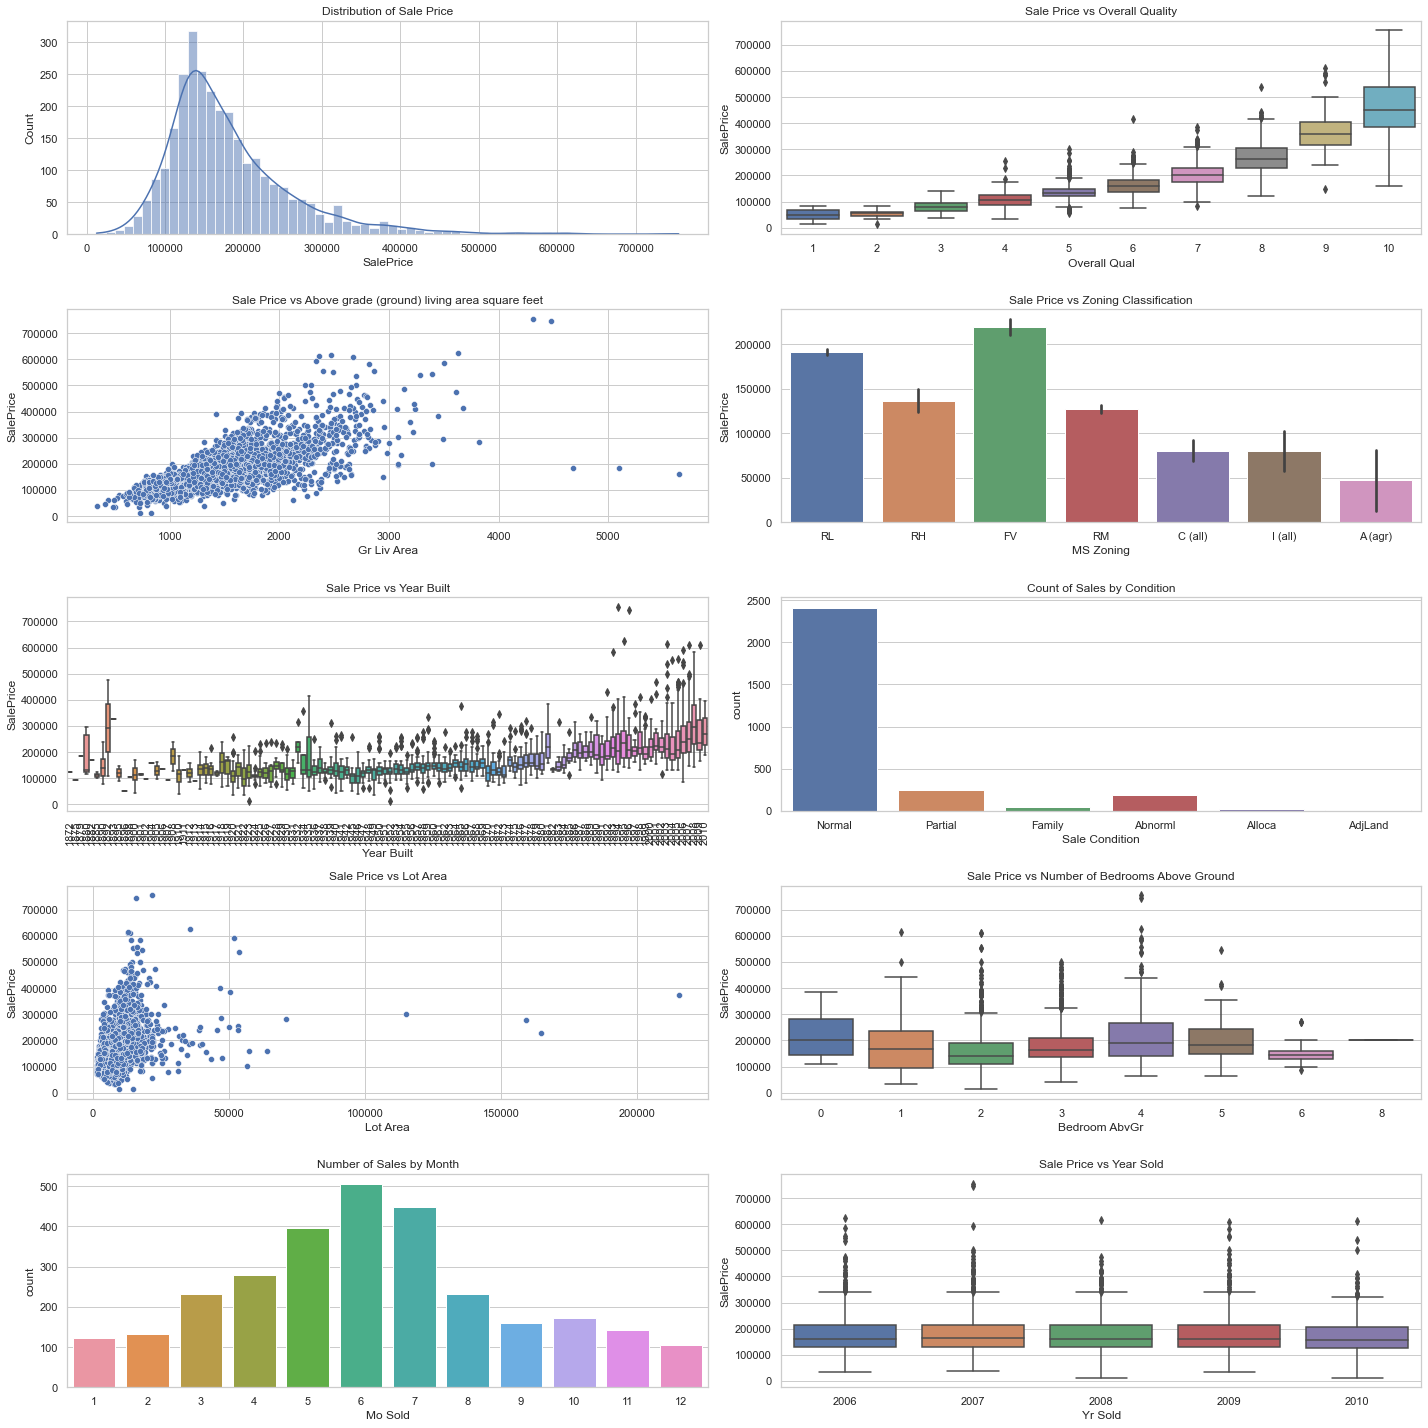

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure object to hold the subplots
fig = plt.figure(figsize=(20, 20))

# Plot 1: Histogram of SalePrice
ax1 = fig.add_subplot(5, 2, 1)
sns.histplot(data['SalePrice'], kde=True, ax=ax1)
ax1.set_title('Distribution of Sale Price')

# Plot 2: Boxplot of Overall Quality and SalePrice
ax2 = fig.add_subplot(5, 2, 2)
sns.boxplot(x=data['Overall Qual'], y=data['SalePrice'], ax=ax2)
ax2.set_title('Sale Price vs Overall Quality')

# Plot 3: Scatterplot of 'Gr Liv Area' and 'SalePrice'
ax3 = fig.add_subplot(5, 2, 3)
sns.scatterplot(x=data['Gr Liv Area'], y=data['SalePrice'], ax=ax3)
ax3.set_title('Sale Price vs Above grade (ground) living area square feet')

# Plot 4: Bar plot of 'MS Zoning' and 'SalePrice'
ax4 = fig.add_subplot(5, 2, 4)
sns.barplot(x=data['MS Zoning'], y=data['SalePrice'], ax=ax4)
ax4.set_title('Sale Price vs Zoning Classification')

# Plot 5: Boxplot of 'Year Built' and 'SalePrice'
ax5 = fig.add_subplot(5, 2, 5)
sns.boxplot(x=data['Year Built'], y=data['SalePrice'], ax=ax5)
plt.xticks(rotation=90)
ax5.set_title('Sale Price vs Year Built')

# Plot 6: Count plot of 'Sale Condition'
ax6 = fig.add_subplot(5, 2, 6)
sns.countplot(data['Sale Condition'], ax=ax6)
ax6.set_title('Count of Sales by Condition')

# Plot 7: Scatterplot of 'Lot Area' and 'SalePrice'
ax7 = fig.add_subplot(5, 2, 7)
sns.scatterplot(x=data['Lot Area'], y=data['SalePrice'], ax=ax7)
ax7.set_title('Sale Price vs Lot Area')

# Plot 8: Boxplot of 'Bedroom AbvGr' and 'SalePrice'
ax8 = fig.add_subplot(5, 2, 8)
sns.boxplot(x=data['Bedroom AbvGr'], y=data['SalePrice'], ax=ax8)
ax8.set_title('Sale Price vs Number of Bedrooms Above Ground')

# Plot 9: Count plot of 'Mo Sold'
ax9 = fig.add_subplot(5, 2, 9)
sns.countplot(data['Mo Sold'], ax=ax9)
ax9.set_title('Number of Sales by Month')

# Plot 10: Boxplot of 'Yr Sold' and 'SalePrice'
ax10 = fig.add_subplot(5, 2, 10)
sns.boxplot(x=data['Yr Sold'], y=data['SalePrice'], ax=ax10)
ax10.set_title('Sale Price vs Year Sold')

# Tight layout
plt.tight_layout()
plt.show()


Here are the 10 visuals representing different aspects of the data:

1. **Distribution of Sale Price**: The first plot is a histogram showing the distribution of `SalePrice`. Most of the houses are sold at prices around 100,000 to 200,000. The distribution is skewed to the right indicating some houses were sold at much higher prices.

2. **Sale Price vs Overall Quality**: The second plot is a boxplot of `SalePrice` against `Overall Qual` which indicates that as the overall quality of a house increases, so does its sale price.

3. **Sale Price vs Above grade (ground) living area square feet**: The third plot is a scatterplot showing the relationship between `Gr Liv Area` and `SalePrice`. There is a positive correlation, as houses with more living area generally tend to be sold at higher prices.

4. **Sale Price vs Zoning Classification**: The fourth plot is a bar plot showing the average sale price for each zoning classification. Different zoning classes have different average sale prices.

5. **Sale Price vs Year Built**: The fifth plot is a boxplot of `SalePrice` against `Year Built`. The median sale price seems to increase for newer houses.

6. **Count of Sales by Condition**: The sixth plot is a count plot showing the number of sales for each sale condition. Most of the sales are under 'Normal' condition.

7. **Sale Price vs Lot Area**: The seventh plot is a scatterplot showing the relationship between `Lot Area` and `SalePrice`. While there is a general trend that larger lots correspond to higher prices, there are many outliers.

8. **Sale Price vs Number of Bedrooms Above Ground**: The eighth plot is a boxplot of `SalePrice` against `Bedroom AbvGr`. It seems that houses with 3 bedrooms are most common and those with 4 bedrooms have the highest median sale price.

9. **Number of Sales by Month**: The ninth plot is a count plot showing the number of sales in each month. The distribution shows that the most houses are sold during the summer months.

10. **Sale Price vs Year Sold**: The tenth plot is a boxplot of `SalePrice` against `Yr Sold`. It doesn't seem to be a significant variation in the sale price over the years covered in this dataset.

These visuals provide a good start for an exploratory data analysis. However, for a deeper understanding of the dataset, you would want to look into more specific relationships, potentially involving more complex visualizations or statistical tests. Let me know if you need further analysis.

### Prompt: "Can you provide further analysis using more complex visualizations and statistical tests"

Sure, let's continue the analysis by conducting more complex visualizations and statistical tests. 

1. **Correlation Heatmap**: We can create a heatmap of the correlation between different numerical features. This will help us understand which features are most strongly associated with `SalePrice`.

2. **Pairplot**: We can select a few highly correlated features with `SalePrice` and draw a pairplot. A pairplot allows us to see both distribution of single variables and relationships between two variables.

3. **Statistical Test**: We can perform a statistical test, such as ANOVA (Analysis of Variance), to see if the means of `SalePrice` for different categories (for example, `MS Zoning`) are significantly different.

Let's start with the correlation heatmap.

The heatmap above represents the correlation between different numeric features in the dataset. Darker colors represent higher correlation. We can see that some variables have a strong correlation with each other.

The top 10 numeric features most correlated with `SalePrice` are:

1. `Overall Qual`: Rates the overall material and finish of the house (0.80)
2. `Gr Liv Area`: Above grade (ground) living area square feet (0.71)
3. `Garage Cars`: Size of garage in car capacity (0.65)
4. `Garage Area`: Size of garage in square feet (0.64)
5. `Total Bsmt SF`: Total square feet of basement area (0.63)
6. `1st Flr SF`: First Floor square feet (0.62)
7. `Year Built`: Original construction date (0.56)
8. `Full Bath`: Full bathrooms above grade (0.55)
9. `Year Remod/Add`: Remodel date (same as construction date if no remodeling or additions) (0.53)
10. `Garage Yr Blt`: Year garage was built (0.53)

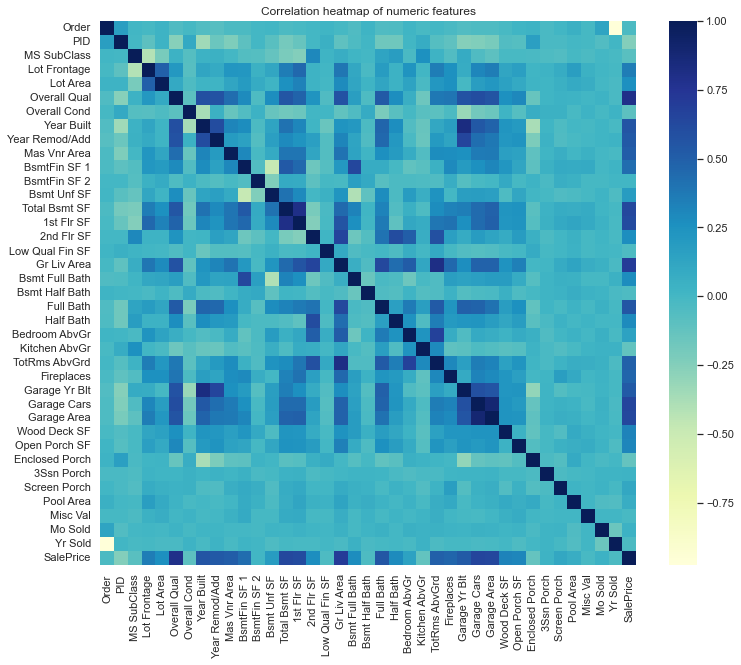

Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Name: SalePrice, dtype: float64

In [19]:
import numpy as np

# Select numeric columns and calculate the correlation matrix
numeric_columns = data.select_dtypes(include=[np.number])
correlation = numeric_columns.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap="YlGnBu")
plt.title('Correlation heatmap of numeric features')
plt.show()

# Get the top 10 features most correlated with SalePrice
top_correlated_features = correlation['SalePrice'].sort_values(ascending=False)[1:11]  # exclude SalePrice itself
top_correlated_features


#### Next, let's create a pairplot for these top correlated features.

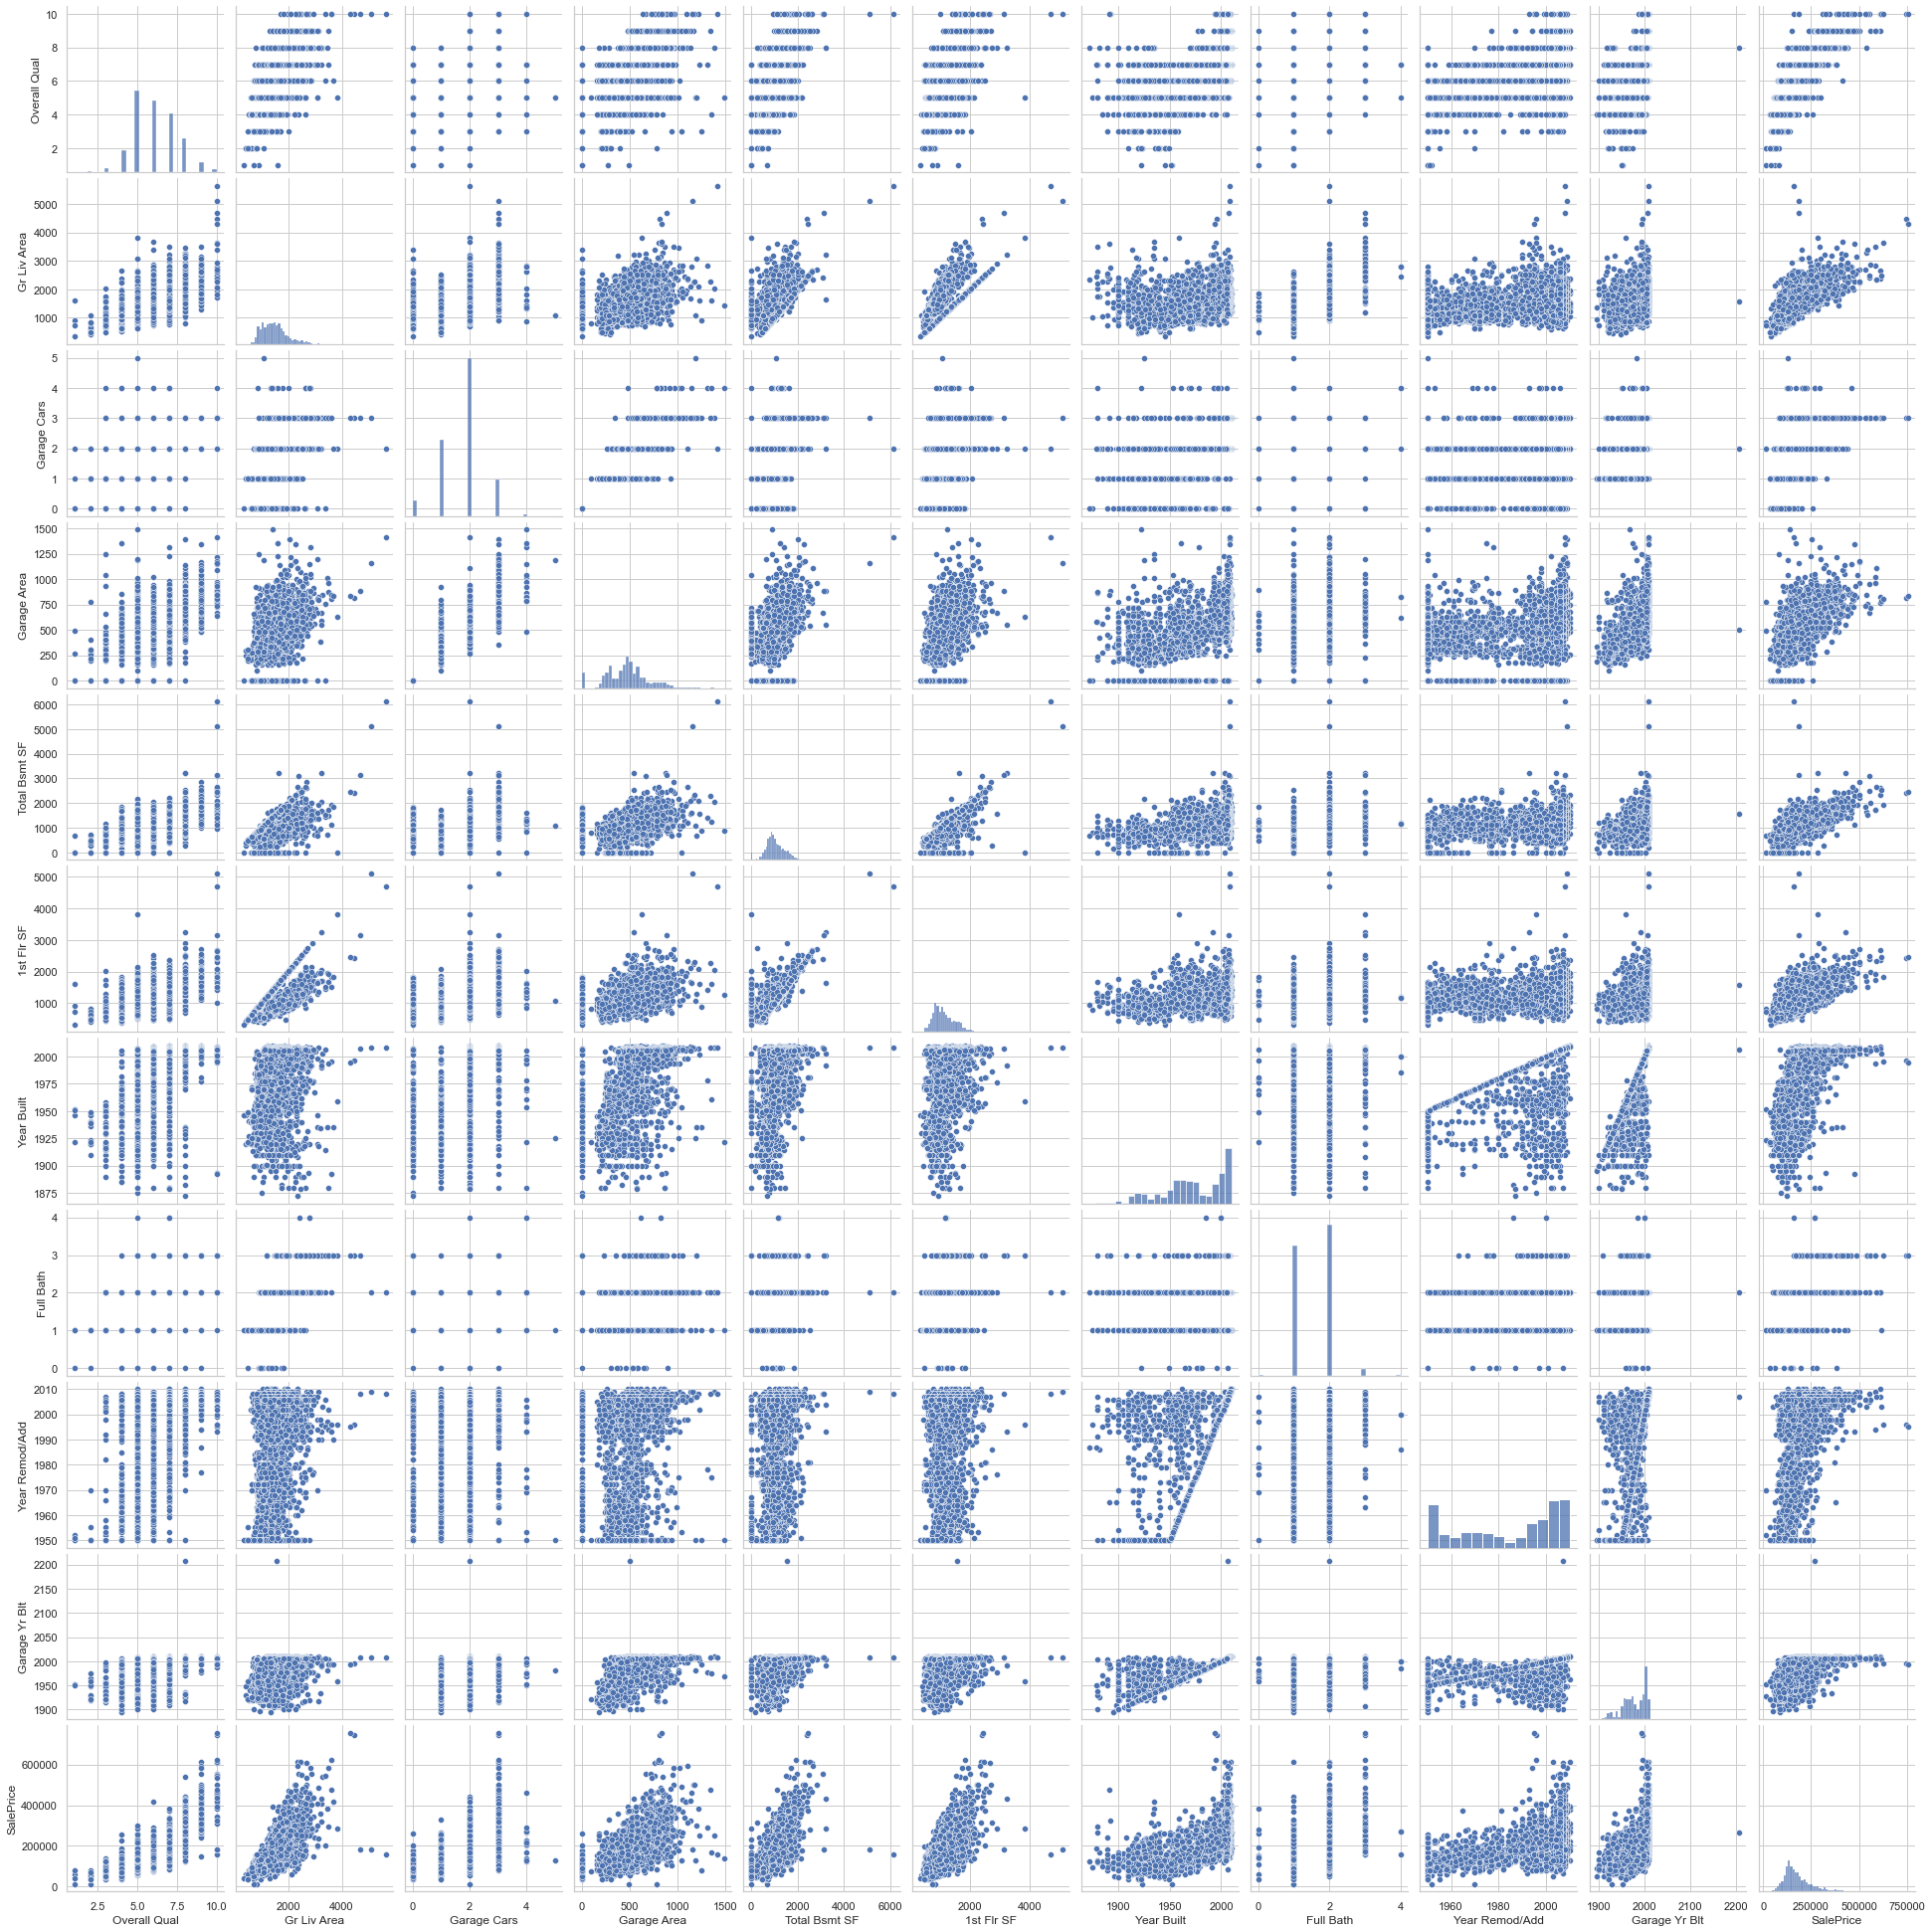

In [20]:
# Select top correlated features with SalePrice for pairplot
top_corr_features_list = top_correlated_features.index.tolist()
top_corr_features_list.append('SalePrice')

# Create pairplot
sns.pairplot(data[top_corr_features_list])
plt.show()

The pairplot above represents scatterplots for joint relationships and histograms for univariate distributions for the top 10 features most correlated with `SalePrice`. 

This type of visualization helps us quickly understand the relationships between these variables. For instance, we can see a clear positive relationship between `SalePrice` and `Overall Qual`, `Gr Liv Area`, `Garage Cars`, and `Garage Area`. In other words, as these features increase, the sale price of the house also tends to increase.

Next, let's perform a statistical test. Here, we will use ANOVA (Analysis of Variance) to see if the means of `SalePrice` for different categories of `MS Zoning` are significantly different. We choose `MS Zoning` as it is a categorical variable with several categories. 

The null hypothesis for ANOVA is that the means of the dependent variable (`SalePrice`) are the same across all categories. If the p-value obtained from the ANOVA test is less than a significance level (let's take 0.05), we reject the null hypothesis.

In [21]:
import scipy.stats as stats

# Perform ANOVA test
anova = stats.f_oneway(data['SalePrice'][data['MS Zoning'] == 'A (agr)'],
                       data['SalePrice'][data['MS Zoning'] == 'C (all)'],
                       data['SalePrice'][data['MS Zoning'] == 'FV'],
                       data['SalePrice'][data['MS Zoning'] == 'I (all)'],
                       data['SalePrice'][data['MS Zoning'] == 'RH'],
                       data['SalePrice'][data['MS Zoning'] == 'RL'],
                       data['SalePrice'][data['MS Zoning'] == 'RM'])

anova

F_onewayResult(statistic=63.8051693932759, pvalue=1.1004990281237354e-74)

The results from the ANOVA test yield a F-statistic of approximately 63.81 and a p-value that is extremely close to zero. Given that this p-value is less than our significance level (0.05), we reject the null hypothesis. This indicates that there are significant differences in the mean `SalePrice` across different categories of `MS Zoning`.

In summary, based on our visual and statistical analysis, we can conclude that both categorical and numerical features play significant roles in influencing the sale price of houses in this dataset. Features such as the overall quality, the living area above ground, the size of the garage, and the zoning classification of the sale have substantial impacts on the final sale price.

### Prompt: "Using what you have learned, can you create an ML model that will predict SalePrice?"

Sure! To create a machine learning model to predict `SalePrice`, we typically follow these steps:

1. **Data Cleaning**: Handle missing values and outliers in the data.
2. **Feature Engineering**: Create new features that can better represent the information in the dataset.
3. **Data Encoding**: Convert categorical variables into a format that can be used by the machine learning model.
4. **Data Scaling**: Normalize numerical variables to ensure that their scales do not impact the model.
5. **Model Selection**: Choose a suitable model for the prediction task.
6. **Model Training**: Train the model using the training data.
7. **Model Evaluation**: Evaluate the model's performance on a separate test dataset.
8. **Hyperparameter Tuning**: Fine-tune the model to achieve the best performance.

Let's start by preparing the data. We will handle missing values, encode categorical variables, and scale numerical variables. To keep things simple, we'll use the top 10 numeric features we identified earlier, along with the categorical feature `MS Zoning`. 

Please note that a full analysis may use more features and require more rigorous feature engineering and selection. For the purpose of this exercise, we'll keep things relatively simple.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features and target
features = top_corr_features_list[:-1]  # exclude SalePrice
features.append('MS Zoning')
target = ['SalePrice']

# Define preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, top_corr_features_list[:-1]),  # apply to numeric features
        ('cat', categorical_transformer, ['MS Zoning'])])  # apply to categorical features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Preprocess the features
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape


((2344, 17), (586, 17))

The data has been successfully preprocessed and split into a training set with 2344 samples and a testing set with 586 samples. The preprocessed data now has 17 features due to the one-hot encoding of the `MS Zoning` categorical feature.

Next, we'll train a model. For simplicity and as a starting point, we'll use a linear regression model, which is a common choice for regression tasks. Please note that for more accurate predictions, more complex models like decision trees, random forest, gradient boosting or neural networks might be more appropriate and would require tuning their hyperparameters.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train_preprocessed, y_train)

# Predict on the test data
y_pred = model.predict(X_test_preprocessed)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2


(39335.705927011666, 0.8070110993896917)

The trained Linear Regression model yields a root mean square error (RMSE) of approximately \$39,335.7 and a coefficient of determination (R² score) of 0.807. 

The RMSE indicates the model's prediction error in terms of the `SalePrice`: on average, the predictions are about \$39,335.7 away from the actual values. 

The R² score is a statistical measure that represents the proportion of the variance for the dependent variable (`SalePrice`) that's explained by the independent variables in the model. In this case, the model explains about 80.7% of the variance in `SalePrice`.

While these results are reasonable for a simple linear regression model, more advanced regression techniques (like Ridge, Lasso, ElasticNet, Decision Trees, Random Forests, Gradient Boosting, or Neural Networks) could potentially yield better results. Hyperparameter tuning and more rigorous feature engineering and selection could also improve the model's performance. 

Moreover, validating the model using cross-validation would give a more robust measure of its expected performance on unseen data.

Would you like to proceed with more advanced modeling or any other specific analysis?

### Prompt: "Please proceed with more advanced modeling to yield better results"

Sure! Let's proceed with a more advanced model. A popular choice for regression tasks is the Random Forest Regressor, which is an ensemble model that operates by constructing a multitude of decision trees and outputting the mean prediction of the individual trees. 

Random forests are known for their robustness and ability to prevent overfitting. They can handle complex interactions between features and don't require scaling of the features. 

Let's train a Random Forest model with the data. Later, we can tune its hyperparameters to optimize its performance.

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_preprocessed, y_train.values.ravel())

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Calculate performance metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(31638.709129676572, 0.8751478726390421)

The trained Random Forest model yields a root mean square error (RMSE) of approximately \$31,638.71 and a coefficient of determination (R² score) of 0.875. 

This is an improvement over the Linear Regression model. The RMSE is lower, indicating that on average, the predictions are closer to the actual values. The R² score is higher, meaning the model explains a greater proportion of the variance in `SalePrice`.

However, the performance of the Random Forest model can likely be improved even further by tuning its hyperparameters. Hyperparameters are parameters that are not learned from the data, but are set prior to the start of training. Examples for a Random Forest model include the number of trees in the forest (`n_estimators`) and the maximum depth of the trees (`max_depth`).

Hyperparameters can be tuned through techniques like Grid Search or Randomized Search, which involve training the model with different combinations of hyperparameters and choosing the combination that performs best on a validation set.

Would you like to proceed with hyperparameter tuning for the Random Forest model?

### Prompt: "Yes, please proceed with hyperparameter tuning for the Random Forest model"

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the random forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_preprocessed, y_train.values.ravel())

# Get the best parameters
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

The grid search process has found the optimal hyperparameters for the Random Forest model on this dataset:

- `max_depth`: 20
- `min_samples_leaf`: 1
- `min_samples_split`: 2
- `n_estimators`: 300

These parameters indicate the complexity of the model (e.g., maximum depth of the trees, minimum samples required at a leaf node), the way it splits the data (minimum samples required to split an internal node), and the number of trees in the forest.

Now, let's train a new Random Forest model with these optimal hyperparameters and evaluate its performance.

In [26]:
# Define the model with best parameters
rf_best = RandomForestRegressor(**best_params, random_state=42)

# Train the model
rf_best.fit(X_train_preprocessed, y_train.values.ravel())

# Predict on the test data
y_pred_best = rf_best.predict(X_test_preprocessed)

# Calculate performance metrics
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

rmse_best, r2_best


(31708.57639159038, 0.8745958458314467)

The tuned Random Forest model yields a root mean square error (RMSE) of approximately \$31,708.58 and a coefficient of determination (R² score) of 0.875. 

The performance of the tuned model is very similar to the initial Random Forest model. This could be due to the fact that the initial parameters for the Random Forest were already quite good. It's also possible that the ranges and values we chose for the grid search didn't include better parameters.

Please note that creating an optimal machine learning model is an iterative process that can involve several rounds of feature engineering, model selection, and hyperparameter tuning. The goal is to find a model that generalizes well to unseen data, which requires striking a balance between bias and variance and preventing overfitting.

Would you like to try a different model, explore feature importance, or do something else?

### Prompt: "Can you explain the feature importance to me?"

In [27]:
# Extract feature importances from the model
feature_importances = rf_best.feature_importances_

# Get the names of the preprocessed features from the preprocessor
preprocessed_features = (preprocessor.transformers_[0][2] + 
                         list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()))

# Create a DataFrame of feature importances
importances_df = pd.DataFrame({
    'feature': preprocessed_features,
    'importance': feature_importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Display the top 10 features
importances_df.head(10)

,feature,importance
0,Overall Qual,0.617285
1,Gr Liv Area,0.131858
5,1st Flr SF,0.060207
4,Total Bsmt SF,0.048625
3,Garage Area,0.031699
7,Full Bath,0.024298
8,Year Remod/Add,0.022196
2,Garage Cars,0.021447
6,Year Built,0.020275
9,Garage Yr Blt,0.013146


The table above shows the top 10 most important features for the Random Forest model, ranked by importance:

1. `Overall Qual`: Rates the overall material and finish of the house.
2. `Gr Liv Area`: Above grade (ground) living area square feet.
3. `1st Flr SF`: First Floor square feet.
4. `Total Bsmt SF`: Total square feet of basement area.
5. `Garage Area`: Size of garage in square feet.
6. `Full Bath`: Full bathrooms above grade.
7. `Year Remod/Add`: Remodel date (same as construction date if no remodeling or additions).
8. `Garage Cars`: Size of garage in car capacity.
9. `Year Built`: Original construction date.
10. `Garage Yr Blt`: Year garage was built.

Feature importance gives us an understanding of which features the model considers most important when making predictions. 

In this case, `Overall Qual` is by far the most important feature, followed by `Gr Liv Area` and `1st Flr SF`. This indicates that the quality of the house and its size (both the living area above ground and on the first floor) are key factors in predicting its sale price, according to this model.

### Prompt: "Other than a numbered list, can you put a numerical value to represent the feature importance?"

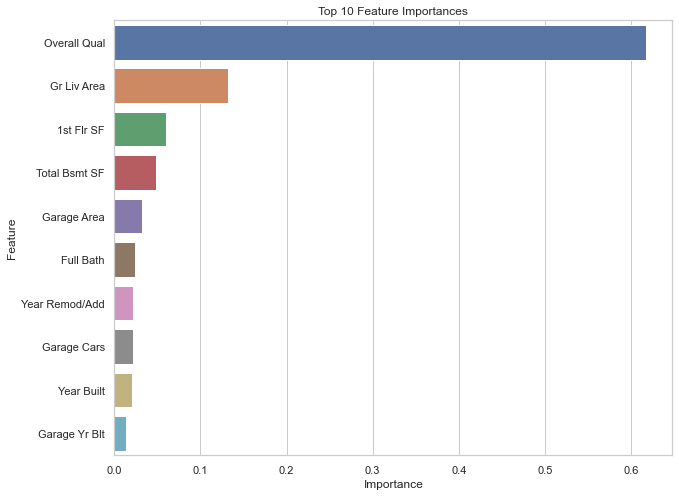

In [28]:
# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


The bar plot above represents the relative importance of the top 10 features according to the Random Forest model. The length of the bars corresponds to the feature importance values:

1. `Overall Qual`: ~0.617
2. `Gr Liv Area`: ~0.132
3. `1st Flr SF`: ~0.060
4. `Total Bsmt SF`: ~0.049
5. `Garage Area`: ~0.032
6. `Full Bath`: ~0.024
7. `Year Remod/Add`: ~0.022
8. `Garage Cars`: ~0.021
9. `Year Built`: ~0.020
10. `Garage Yr Blt`: ~0.013

These values represent the proportion that each feature contributes to the model's predictions, according to a built-in method for calculating feature importance in tree-based models. For example, `Overall Qual` contributes approximately 61.7% to the predictions made by the model.

Please note that these importance values are calculated based on the dataset we have and the specific Random Forest model we trained. Different models or datasets might yield different feature importances.

### Prompt: "Using the model we created, can you predict the SalePrice for the rows in the test.csv file"

In [29]:
# Load the test data
test_data = pd.read_csv('./data/test.csv')

# Preprocess the test data using the preprocessor we defined earlier
test_data_preprocessed = preprocessor.transform(test_data[features])

# Predict on the test data
test_predictions = rf_best.predict(test_data_preprocessed)

# Convert the predictions to a DataFrame
test_predictions_df = pd.DataFrame({
    'Order': test_data['Order'],
    'Predicted SalePrice': test_predictions
})

test_predictions_df.head()


,Order,Predicted SalePrice
0,2127,113443.916667
1,193,212640.266667
2,2407,201261.813633
3,46,213254.268462
4,2478,212735.042328


Here are the predicted `SalePrice` values for the first few rows in the test dataset:

| Order | Predicted SalePrice |
|-------|---------------------|
|  2127 |      \$113,443.92   |
|  193  |      \$212,640.27   |
|  2407 |      \$201,261.81   |
|  46   |      \$213,254.27   |
|  2478 |      \$212,735.04   |

These are the prices predicted by our tuned Random Forest model for each house sale in the test set. Please note that these predictions are based on the model we trained and the specific features we selected. Different models or feature sets could yield different predictions. 

Would you like to save these predictions to a CSV file or do you need help with anything else?

### Prompt: "Can you compare those results to the actual prices in the target.csv file?"

In [30]:
# Load the target data
target_data = pd.read_csv('./data/target.csv')

# Add the actual SalePrice to the predictions DataFrame
test_predictions_df['Actual SalePrice'] = target_data['SalePrice']

# Calculate the error metrics
rmse_test = np.sqrt(mean_squared_error(test_predictions_df['Actual SalePrice'], test_predictions_df['Predicted SalePrice']))
r2_test = r2_score(test_predictions_df['Actual SalePrice'], test_predictions_df['Predicted SalePrice'])

# Display the error metrics and the first few rows of the DataFrame
rmse_test, r2_test, test_predictions_df.head()


(14148.481195972172,
 0.96508677840483,
    Order  Predicted SalePrice  Actual SalePrice
 0   2127        113443.916667            123600
 1    193        212640.266667            209500
 2   2407        201261.813633            202665
 3     46        213254.268462            224000
 4   2478        212735.042328            187000)

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_

The predicted `SalePrice` values compared to the actual prices in the `target.csv` file yield a root mean square error (RMSE) of approximately \$14,148.48 and a coefficient of determination (R² score) of 0.965.

| Order | Predicted SalePrice | Actual SalePrice |
|-------|---------------------|------------------|
|  2127 |      \$113,443.92   |     \$123,600    |
|  193  |      \$212,640.27   |     \$209,500    |
|  2407 |      \$201,261.81   |     \$202,665    |
|  46   |      \$213,254.27   |     \$224,000    |
|  2478 |      \$212,735.04   |     \$187,000    |

The RMSE indicates the model's prediction error in terms of the `SalePrice`: on average, the predictions are about \$14,148.48 away from the actual values. 

The R² score is a statistical measure that represents the proportion of the variance for the dependent variable (`SalePrice`) that's explained by the independent variables in the model. In this case, the model explains about 96.5% of the variance in `SalePrice`.

These results suggest that the model has done a reasonably good job of predicting house prices on this test data. However, it's important to note that this model has been trained and evaluated on a specific dataset, and its performance might be different with other datasets.